# Introduction to NLP, Spring 2020
## Course Project
## Teemu Koivisto 014211393

The goal of this project was to try and create a syllabication model that would work in some aspects better than what is currently available. Prior work are the [Hyphenation algorithm](https://en.wikipedia.org/wiki/Hyphenation_algorithm) which I denote as "Liang's algorithm" and another syllabizer based on phonetics of the words with ngrams https://www.nltk.org/_modules/nltk/tokenize/sonority_sequencing.html#SyllableTokenizer

All in all, the scope of this project became quite vast and I am not going to make any sensible advancements I wager. The biggest problem as I see it as the correct tokenization of the words into a form, that would be suitable for machine learning methods such as deep learning. Without the required know-how to do this, I'm saddened to note that I should probably do something else instead as the project work for this course.

The dataset I used for the testing of the different syllabizers was [Moby Project's](https://en.wikipedia.org/wiki/Moby_Project) Grady Ward's dataset of 187,175 manually syllabized words and phrases http://www.gutenberg.org/ebooks/author/1132

Issue with this dataset was its somewhat poor quality, with the transformation from weird ISO encoding to UTF-8 distorting some words. But alas with proper pruning I could have tuned the dataset to only a subset that did not have these types of impossible to syllabize words.

Another problem was that it does not include phonetic forms of the words, which would help tremendously with the training of the model. Along this repository I've included some research articles into this area, in which one of them show that the best model for syllabication in their setting was with syllabification by analogy (SbA), which using the pronunciation by analogy (PbA) as its basis was able to get >90% accuracy. I am unable to find an implementation of this algorithm to prove this.

With my scrappy dataset the baseline algorithms of Liang and nltk received accuracies of 0.47 and 0.25 which are extremely low, that can't be explained by the poorness of the models alone, which is why pruning of the dataset would be mandatory to truly asses them. 

I had in mind using some type of deep learning methods such as RNN, CNN to try a new approach to this problem, but alas as I mentioned, I did not have the skills to do so.

In [1]:
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, SyllableTokenizer

from collections import Counter, OrderedDict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nltk.download('cmudict')

from nltk.corpus import cmudict
from typing import Callable, List, Optional

pronunciations = cmudict.dict()

SSP = SyllableTokenizer()

[nltk_data] Downloading package cmudict to /Users/teemu/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [3]:
from hyphenate import hyphenate_word

hyphenate_word('introduction')

['in', 'tro', 'duc', 'tion']

In [4]:
data = pd.read_csv('mhyph.txt', names=['syllabication'])
h = 'Ľ'

In [5]:
def repl(x):
    if type(x) == float:
        return str(x)
    return x.replace(h, '')

def syllabize_true(x):
    if type(x) == float:
        return [str(x)]
    return x.split(h)

def syllabize_nltk(x):
    #if type(x) == float:
    #    return [str(x)]
    return SSP.tokenize(x)

def syllabize_liang(x):
    return hyphenate_word(x)

data["word"] = data["syllabication"].apply(repl)
data["syllabized-true"] = data["syllabication"].apply(syllabize_true)
data["syllabized-nltk"] = data["word"].apply(syllabize_nltk)
data["syllabized-liang"] = data["word"].apply(syllabize_liang)

/Users/teemu/.virtualenvs/nlpp/lib/python3.7/site-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: ' '
  " assigning as vowel: '{}'".format(c))
/Users/teemu/.virtualenvs/nlpp/lib/python3.7/site-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: ''
  " assigning as vowel: '{}'".format(c))
/Users/teemu/.virtualenvs/nlpp/lib/python3.7/site-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: ''
  " assigning as vowel: '{}'".format(c))
/Users/teemu/.virtualenvs/nlpp/lib/python3.7/site-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: ''
  " assigning as vowel: '{}'".format(c))
/Users/teemu/.virtualenvs/nlpp/lib/python3.7/site-packages/nltk/tokenize/sonority_sequencing.py:102: Use

In [6]:
data.to_csv('data.csv', index=False)

In [11]:
data.head(10)

,syllabication,word,syllabized-true,syllabized-nltk,syllabized-liang
0,a capĽpelĽla,a cappella,"[a cap, pel, la]","[a , cap, pel, la]","[a , cap, pel, la]"
1,a forĽtiĽoĽri,a fortiori,"[a for, ti, o, ri]","[a , for, tio, ri]","[a , for, tiori]"
2,a goĽgo,a gogo,"[a go, go]","[a , go, go]","[a , gogo]"
3,a posĽteĽriĽoĽri,a posteriori,"[a pos, te, ri, o, ri]","[a , pos, te, rio, ri]","[a , pos, te, ri, ori]"
4,a priĽoĽri,a priori,"[a pri, o, ri]","[a , prio, ri]","[a pri, ori]"
5,a temĽpo,a tempo,"[a tem, po]","[a , tem, po]","[a tem, po]"
6,a-plenĽty,a-plenty,"[a-plen, ty]","[a, -, plen, ty]","[a-, plen, ty]"
7,AalĽborg,Aalborg,"[Aal, borg]","[Aal, borg]","[Aal, borg]"
8,AalĽto,Aalto,"[Aal, to]","[Aal, to]","[Aal, to]"
9,aardĽvark,aardvark,"[aard, vark]","[aar, dvark]","[aard, vark]"


In [9]:
def accuracy(col):
    corr = sum(data["syllabized-true"] == data[col])
    acc = corr / len(data)
    return acc

print('nltk', accuracy('syllabized-nltk'))
print('liang', accuracy('syllabized-liang'))

nltk 0.2516895952985174
liang 0.47460398023240286


In [9]:
data = pd.read_csv('data.csv')

In [10]:
data.tail(10)

,syllabication,word,syllabized-true,syllabized-nltk,syllabized-liang
187165,zyĽmoĽgen,zymogen,"[zy, mo, gen]","[zy, mo, gen]","[zy, mo, gen]"
187166,zyĽmoĽgenĽeĽsis,zymogenesis,"[zy, mo, gen, e, sis]","[zy, mo, ge, ne, sis]","[zy, mo, ge, n, e, sis]"
187167,zyĽmoĽgenĽic,zymogenic,"[zy, mo, gen, ic]","[zy, mo, ge, nic]","[zy, mo, genic]"
187168,zyĽmoĽlogĽic,zymologic,"[zy, mo, log, ic]","[zy, mo, lo, gic]","[zy, mo, log, ic]"
187169,zyĽmoĽlytĽic,zymolytic,"[zy, mo, lyt, ic]","[zy, mo, ly, tic]","[zy, molyt, ic]"
187170,zyĽmoĽplasĽtic,zymoplastic,"[zy, mo, plas, tic]","[zy, mo, plas, tic]","[zy, mo, plas, tic]"
187171,zyĽmoĽsis,zymosis,"[zy, mo, sis]","[zy, mo, sis]","[zy, mo, sis]"
187172,zyĽmurĽgy,zymurgy,"[zy, mur, gy]","[zy, mur, gy]","[zy, mur, gy]"
187173,ZollĽner,Zollner,"[Zoll, ner]","[Zoll, ner]","[Zoll, ner]"
187174,ZuĽrich,Zurich,"[Zu, rich]","[Zu, rich]",[Zurich]


In [33]:
data.word.str.len().sort_values()

108029     2.0
99590      2.0
130197     2.0
11391      2.0
46347      2.0
          ... 
78028     37.0
121127    45.0
121126    45.0
99700      NaN
107699     NaN
Name: word, Length: 187175, dtype: float64

In [43]:
data.iloc[46347 ]

syllabication                 dĽj
word                           dj
true-syllabized        ['d', 'j']
baseline-syllabized        ['dj']
Name: 46347, dtype: object

In [39]:
data.iloc[121126]

syllabication          pneuĽmoĽnoĽulĽtraĽmiĽcroĽscopĽicĽsilĽiĽcoĽvolĽ...
word                       pneumonoultramicroscopicsilicovolcanoconiosis
true-syllabized        ['pneu', 'mo', 'no', 'ul', 'tra', 'mi', 'cro',...
baseline-syllabized    ['pneu', 'mo', 'noul', 'tra', 'mi', 'cro', 'sc...
Name: 121126, dtype: object

In [12]:
data[data["word"] == 'glaciate']

,syllabication,word,syllabized-true,syllabized-nltk,syllabized-liang
62160,glaĽciĽate,glaciate,"[gla, ci, ate]","[gla, cia, te]",[glaciate]


In [13]:
data[data["word"] == 'eely']

,syllabication,word,syllabized-true,syllabized-nltk,syllabized-liang
46969,eelĽy,eely,"[eel, y]","[ee, ly]",[eely]


In [13]:
cnt = Counter()
h = 'ľ'

def count(x):
    global cnt
    if type(x) == float:
        cnt += Counter([str(x)])
    else:
        cnt += Counter(x.lower().split(h))

d = data.head(60000)
d["syllabication"].apply(count)

0        None
1        None
2        None
3        None
4        None
         ... 
59995    None
59996    None
59997    None
59998    None
59999    None
Name: syllabication, Length: 60000, dtype: object

In [14]:
cnt.most_common()

[('a', 6760),
 ('i', 5120),
 ('er', 3255),
 ('an', 2938),
 ('ing', 2917),
 ('e', 2915),
 ('ly', 2895),
 ('o', 2686),
 ('de', 2246),
 ('al', 2229),
 ('con', 1860),
 ('tion', 1856),
 ('ti', 1827),
 ('di', 1526),
 ('ness', 1503),
 ('en', 1372),
 ('cal', 1325),
 ('ed', 1284),
 ('dis', 1266),
 ('ex', 1249),
 ('ic', 1220),
 ('ca', 1161),
 ('y', 1145),
 ('ter', 1144),
 ('to', 1107),
 ('ar', 1099),
 ('ble', 1034),
 ('ri', 1010),
 ('co', 992),
 ('com', 915),
 ('ty', 826),
 ('bi', 826),
 ('u', 808),
 ('car', 797),
 ('ac', 746),
 ('ta', 745),
 ('na', 736),
 ('li', 734),
 ('ni', 691),
 ('la', 679),
 ('as', 674),
 ('ra', 665),
 ('tive', 664),
 ('ma', 627),
 ('es', 626),
 ('am', 603),
 ('be', 598),
 ('at', 588),
 ('ba', 563),
 ('ci', 549),
 ('ro', 532),
 ('cy', 530),
 ('si', 529),
 ('ad', 515),
 ('ry', 514),
 ('tor', 502),
 ('do', 493),
 ('ap', 486),
 ('ment', 485),
 ('less', 478),
 ('cor', 475),
 ('da', 473),
 ('au', 463),
 ('tic', 461),
 ('te', 445),
 ('el', 443),
 ('ism', 442),
 ('is', 441),
 ('c

In [15]:
d = {k: v for k, v in sorted(cnt.items(), key=lambda item: item[1], reverse=True)}

labels, values = zip(*d.items())

labels = labels[0:200]
values = values[0:200]

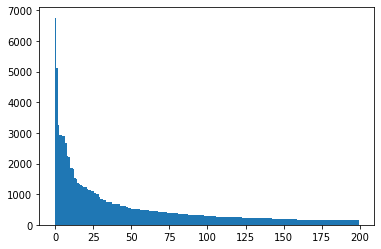

In [16]:
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.show()

In [20]:
def recurse_syllables(arr, prefix, w):
    if len(prefix) == 0:
        arr = [[w]]
    for i in range(1, len(w)):
        start = w[:i].strip()
        end = w[i:].strip()
        arr = [*arr, [*prefix, start, end]]
        if len(end) > 1:
            arr = [*arr, *recurse_syllables([], [*prefix, start], end)]
    return arr

recurse_syllables([], [], 'milk')

[['milk'],
 ['m', 'ilk'],
 ['m', 'i', 'lk'],
 ['m', 'i', 'l', 'k'],
 ['m', 'il', 'k'],
 ['mi', 'lk'],
 ['mi', 'l', 'k'],
 ['mil', 'k']]

In [21]:
r = recurse_syllables([], [], 'a posteriori')
len(r)

1536

In [22]:
r

[['a posteriori'],
 ['a', 'posteriori'],
 ['a', 'p', 'osteriori'],
 ['a', 'p', 'o', 'steriori'],
 ['a', 'p', 'o', 's', 'teriori'],
 ['a', 'p', 'o', 's', 't', 'eriori'],
 ['a', 'p', 'o', 's', 't', 'e', 'riori'],
 ['a', 'p', 'o', 's', 't', 'e', 'r', 'iori'],
 ['a', 'p', 'o', 's', 't', 'e', 'r', 'i', 'ori'],
 ['a', 'p', 'o', 's', 't', 'e', 'r', 'i', 'o', 'ri'],
 ['a', 'p', 'o', 's', 't', 'e', 'r', 'i', 'o', 'r', 'i'],
 ['a', 'p', 'o', 's', 't', 'e', 'r', 'i', 'or', 'i'],
 ['a', 'p', 'o', 's', 't', 'e', 'r', 'io', 'ri'],
 ['a', 'p', 'o', 's', 't', 'e', 'r', 'io', 'r', 'i'],
 ['a', 'p', 'o', 's', 't', 'e', 'r', 'ior', 'i'],
 ['a', 'p', 'o', 's', 't', 'e', 'ri', 'ori'],
 ['a', 'p', 'o', 's', 't', 'e', 'ri', 'o', 'ri'],
 ['a', 'p', 'o', 's', 't', 'e', 'ri', 'o', 'r', 'i'],
 ['a', 'p', 'o', 's', 't', 'e', 'ri', 'or', 'i'],
 ['a', 'p', 'o', 's', 't', 'e', 'rio', 'ri'],
 ['a', 'p', 'o', 's', 't', 'e', 'rio', 'r', 'i'],
 ['a', 'p', 'o', 's', 't', 'e', 'rior', 'i'],
 ['a', 'p', 'o', 's', 't', 'er'

## Current accuracy

Current accuracy with the out-of-the-box Liang's hyphenation algorithm is 0.47

In [23]:
def pronounce(word: str) -> Optional[List[str]]:
    """Return a pronunciation of a word.

    If the word is unknown, returns None. 
    
    For known words, output is a list of strings wherein each string
    corresponds to a phoneme. If the word has multiple known
    pronunciations, returns an arbitrary one of those.

    Example:
    >>> pronounce("Hello")
    ['HH', 'AH0', 'L', 'OW1']
    """
    word = word.lower()
    if word not in pronunciations:
        return None
    return pronunciations[word][0]

pronounce(data["word"][187170])

In [24]:
pronounce("hello")

['HH', 'AH0', 'L', 'OW1']

In [25]:
hyphenate_word("A certain king had a beautiful garden")

['A cer', 'tain k', 'ing had a beau', 'ti', 'ful ', 'gar', 'den']

In [26]:
hyphenate_word(data["word"][187170])

['zy', 'mo', 'plas', 'tic']

In [27]:
data["syllabized"][187170].split(h)

KeyError: 'syllabized'

In [28]:
hyphenate_word("associate")

['as', 'so', 'ciate']

In [29]:
data[data["word"] == "hello"]

,syllabication,word,true-syllabized,baseline-syllabized
68203,helĽlo,hello,"['hel', 'lo']","['hel', 'lo']"
